# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
pd.pivot_table(data = sinasc_raw,
               values = 'munResLat',
               index = 'ESCMAE',
               aggfunc = ['min', 'max'])

,min,max
,munResLat,munResLat
ESCMAE,,
1 a 3 anos,-13.47656,-8.76889
12 anos ou mais,-13.49976,-8.76889
4 a 7 anos,-13.49976,-8.76889
8 a 11 anos,-13.49976,-8.76889
Nenhuma,-12.74137,-8.76889


In [5]:
sinasc_raw['munResLat'].min()

-13.49976

In [6]:
sinasc_raw['munResLat'].max()

-8.76889

In [7]:
sinasc_1 = sinasc_raw[['munResLat', 'IDADEMAE', 'IDADEPAI']].copy()
sinasc_munResLat = pd.cut(sinasc_1['munResLat'],[-13.5,-10.5,-8.7])

In [8]:
sinasc_1.groupby(sinasc_munResLat, observed=True)[['IDADEMAE', 'IDADEPAI']].agg([
    ('soma', 'sum'), ('media', 'mean'), 'min', 'max', ('mediana', 'median'), ('desvio padrao', 'std'), ('variancia', 'var')
])

IDADEMAE                                                      \
                   soma      media min max mediana desvio padrao  variancia   
munResLat                                                                     
(-13.5, -10.5]   340143  26.178943  12  53    26.0      6.320385  39.947272   
(-10.5, -8.7]    365094  26.014964  11  52    25.0      6.447663  41.572355   

                IDADEPAI                                               \
                    soma      media   min   max mediana desvio padrao   
munResLat                                                               
(-13.5, -10.5]  198460.0  30.903145  15.0  86.0    30.0      7.707002   
(-10.5, -8.7]    38038.0  32.126689  16.0  73.0    31.0      8.034214   

                           
                variancia  
munResLat                  
(-13.5, -10.5]  59.397875  
(-10.5, -8.7]   64.548602

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [9]:
pd.pivot_table(data = sinasc_raw,
               values = 'munResArea',
               index = 'ESCMAE',
               aggfunc = ['min', 'max'])

,min,max
,munResArea,munResArea
ESCMAE,,
1 a 3 anos,459.978,34096.394
12 anos ou mais,459.978,34096.394
4 a 7 anos,459.978,34096.394
8 a 11 anos,459.978,34096.394
Nenhuma,831.857,34096.394


In [10]:
sinasc_raw['munResArea'].min()

459.978

In [11]:
sinasc_raw['munResArea'].max()

34096.394

In [12]:
sinasc_2 = sinasc_raw[['munResArea', 'IDADEMAE', 'IDADEPAI']].copy()
sinasc_munResArea = pd.cut(sinasc_2['munResArea'],[458,3000,34097])

In [13]:
sinasc_2.groupby(sinasc_munResArea, observed=True)[['IDADEMAE', 'IDADEPAI']].agg([
    ('soma', 'sum'), ('media', 'mean'), 'min', 'max', ('mediana', 'median'), ('desvio padrao', 'std'), ('variancia', 'var')
])

IDADEMAE                                                      \
                  soma      media min max mediana desvio padrao  variancia   
munResArea                                                                   
(458, 3000]     137389  26.324775  11  53    26.0      6.305535  39.759775   
(3000, 34097]   567848  26.038518  12  53    25.0      6.405497  41.030387   

               IDADEPAI                                               \
                   soma      media   min   max mediana desvio padrao   
munResArea                                                             
(458, 3000]     78074.0  31.092792  16.0  69.0    30.0      7.675474   
(3000, 34097]  158424.0  31.094014  15.0  86.0    30.0      7.818364   

                          
               variancia  
munResArea                
(458, 3000]    58.912900  
(3000, 34097]  61.126809

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [14]:
sinasc_3 = sinasc_raw[['munResAlt', 'IDADEMAE', 'IDADEPAI']].copy()
sinasc_munResAlt = pd.qcut(sinasc_3['munResAlt'],3)
sinasc_munResAlt.value_counts()

munResAlt
(111.0, 177.0]     9762
(84.999, 111.0]    9088
(177.0, 595.0]     8177
Name: count, dtype: int64

In [15]:
sinasc_3.groupby(sinasc_munResAlt, observed=True)[['IDADEMAE', 'IDADEPAI']].agg([
    ('soma', 'sum'), ('media', 'mean'), 'min', 'max', ('mediana', 'median'), ('desvio padrao', 'std'), ('variancia', 'var')
])

IDADEMAE                                                      \
                    soma      media min max mediana desvio padrao  variancia   
munResAlt                                                                      
(84.999, 111.0]   238367  26.228763  12  47    26.0      6.539797  42.768945   
(111.0, 177.0]    253069  25.923889  11  52    25.0      6.331844  40.092250   
(177.0, 595.0]    213801  26.146631  13  53    26.0      6.276696  39.396917   

                 IDADEPAI                                               \
                     soma      media   min   max mediana desvio padrao   
munResAlt                                                                
(84.999, 111.0]   22963.0  32.387870  16.0  73.0    32.0      7.994731   
(111.0, 177.0]    89185.0  31.150891  15.0  66.0    30.0      7.815858   
(177.0, 595.0]   124350.0  30.825483  16.0  86.0    30.0      7.676821   

                            
                 variancia  
munResAlt                   
(84.999, 111.0]  63.915728  
(111.0, 177.0]   61.087636  
(177.0, 595.0]   58.933583

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [16]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [17]:
sinasc_4 = sinasc_raw[['munResNome','DTNASC','IDADEMAE']].copy()

In [18]:
sinasc_4['RegImed'] = sinasc_raw['munResNome'].map(imediatas)

In [19]:
sinasc_4['DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'])
sinasc_4['ano_mes'] = sinasc_4['DTNASC'].dt.to_period('M')

In [20]:
idade_media = sinasc_4.groupby(['ano_mes', 'RegImed'])['IDADEMAE'].mean().unstack()

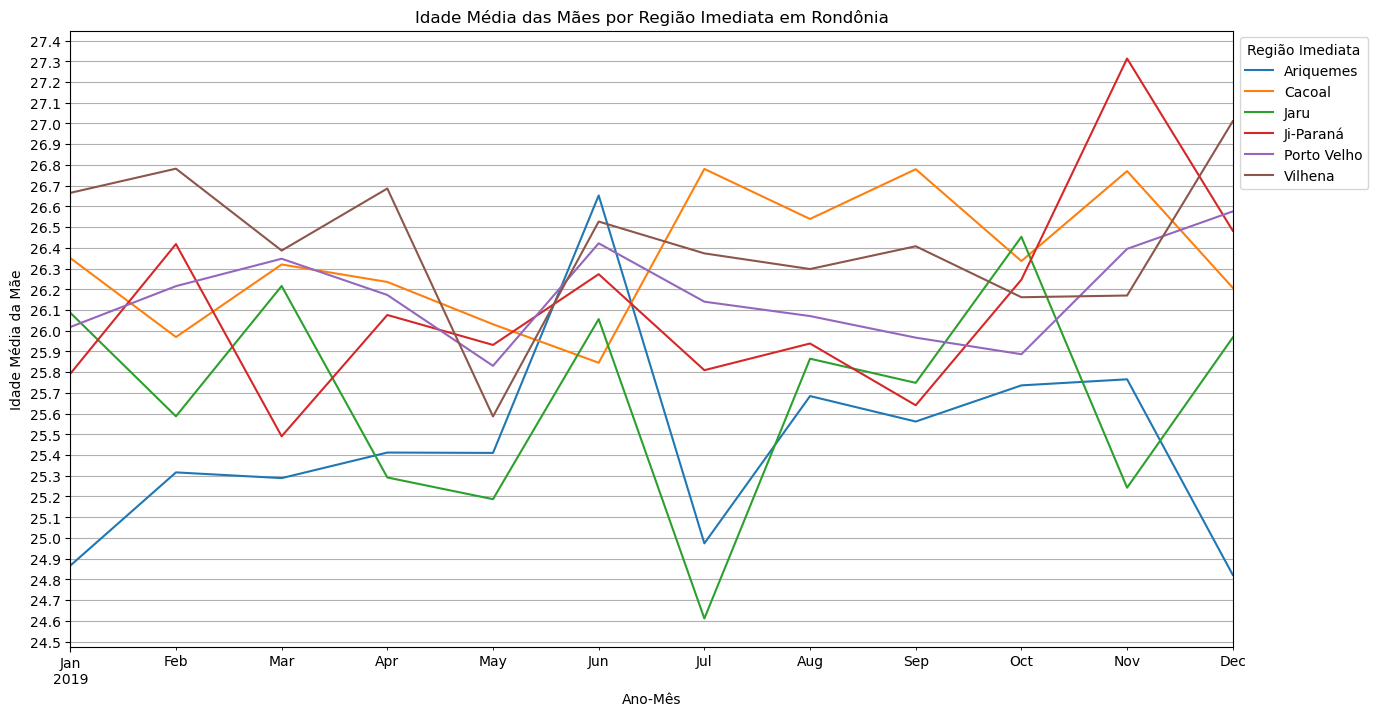

In [21]:
idade_media.plot(figsize=(15,8))
plt.title('Idade Média das Mães por Região Imediata em Rondônia')
plt.xlabel('Ano-Mês')
plt.legend(title="Região Imediata", bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel('Idade Média da Mãe')
plt.grid(True)

ticks = np.arange(24.5, 27.5, 0.1)
plt.yticks(ticks)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [160]:
sinasc_5 =  sinasc_raw[['IDADEMAE','IDADEPAI','PESO','munResNome','APGAR5']].copy()

In [161]:
idh = {
    'Porto Velho': 'IDH-M alto',
    'Vilhena': 'IDH-M alto',
    'Cacoal': 'IDH-M alto',
    'Ji-Paraná': 'IDH-M alto',
    'Pimenta Bueno': 'IDH-M alto',
    'Ariquemes': 'IDH-M alto',
    'Rolim de Moura': 'IDH-M alto',
    'Cerejeiras': 'IDH-M médio',
    'Jaru': 'IDH-M médio',
    'Colorado do Oeste': 'IDH-M médio',
    'Ouro Preto do Oeste': 'IDH-M médio',
    "Espigão D'Oeste": 'IDH-M médio',
    "Santa Luzia D'Oeste": 'IDH-M médio',
    'Pimenteiras do Oeste': 'IDH-M médio',
    'Presidente Médici': 'IDH-M médio',
    'Castanheiras': 'IDH-M médio',
    'Guajará-Mirim': 'IDH-M médio',
    'Chupinguaia': 'IDH-M médio',
    'Cabixi': 'IDH-M médio',
    'Candeias do Jamari': 'IDH-M médio',
    "São Felipe D'Oeste": 'IDH-M médio',
    'Cacaulândia': 'IDH-M médio',
    'São Miguel do Guaporé': 'IDH-M médio',
    'Mirante da Serra': 'IDH-M médio',
    "Alvorada D'Oeste": 'IDH-M médio',
    'Teixeirópolis': 'IDH-M médio',
    "Nova Brasilândia D'Oeste": 'IDH-M médio',
    'Rio Crespo': 'IDH-M médio',
    'Primavera de Rondônia': 'IDH-M médio',
    "Alta Floresta D'Oeste": 'IDH-M médio',
    'Ministro Andreazza': 'IDH-M médio',
    'Novo Horizonte do Oeste': 'IDH-M médio',
    'Vale do Paraíso': 'IDH-M médio',
    'Alto Paraíso': 'IDH-M médio',
    'Parecis': 'IDH-M médio',
    'Buritis': 'IDH-M médio',
    'Itapuã do Oeste': 'IDH-M médio',
    'Corumbiara': 'IDH-M médio',
    'Cujubim': 'IDH-M médio',
    'Costa Marques': 'IDH-M médio',
    'São Francisco do Guaporé': 'IDH-M médio',
    'Urupá': 'IDH-M médio',
    'Monte Negro': 'IDH-M médio',
    'Seringueiras': 'IDH-M baixo',
    'Governador Jorge Teixeira': 'IDH-M baixo',
    "Machadinho D'Oeste": 'IDH-M baixo',
    'Campo Novo de Rondônia': 'IDH-M baixo',
    'Alto Alegre dos Parecis': 'IDH-M baixo',
    'Theobroma': 'IDH-M baixo',
    'Nova União': 'IDH-M baixo',
    'Nova Mamoré': 'IDH-M baixo',
    'Vale do Anari': 'IDH-M baixo'
}

In [162]:
sinasc_5 = sinasc_5.set_index('munResNome')

In [163]:
sinasc_5.groupby(ifdm , dropna=False).count()

,IDADEMAE,IDADEPAI,PESO,APGAR5
munResNome,,,,
Desenvolvimento moderado,21946,6225,21946,21867
Desenvolvimento regular,5081,1381,5081,5057
NaN,1,1,1,1


In [165]:
sinasc_5.groupby(idh , dropna=False).mean().round(2)

,IDADEMAE,IDADEPAI,PESO,APGAR5
munResNome,,,,
IDH-M alto,26.28,31.07,3245.62,9.17
IDH-M baixo,25.33,30.62,3231.46,9.17
IDH-M médio,25.88,31.21,3240.85,9.20
NaN,24.00,22.00,3215.00,10.00


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [166]:
ifdm = {
    'Ariquemes': 'Desenvolvimento moderado',
    'Vilhena': 'Desenvolvimento moderado',
    'Pimenta Bueno': 'Desenvolvimento moderado',
    'Porto Velho': 'Desenvolvimento moderado',
    'Ji-Paraná': 'Desenvolvimento moderado',
    'Cacoal': 'Desenvolvimento moderado',
    "Santa Luzia D'Oeste": 'Desenvolvimento moderado',
    'Rolim de Moura': 'Desenvolvimento moderado',
    'Chupinguaia': 'Desenvolvimento moderado',
    'São Miguel do Guaporé': 'Desenvolvimento moderado',
    'Pimenteiras do Oeste': 'Desenvolvimento moderado',
    'Teixeirópolis': 'Desenvolvimento moderado',
    'Colorado do Oeste': 'Desenvolvimento moderado',
    'Jaru': 'Desenvolvimento moderado',
    'Rio Crespo': 'Desenvolvimento moderado',
    'Primavera de Rondônia': 'Desenvolvimento moderado',
    "Alta Floresta D'Oeste": 'Desenvolvimento moderado',
    'Ouro Preto do Oeste': 'Desenvolvimento moderado',
    'São Francisco do Guaporé': 'Desenvolvimento moderado',
    'Candeias do Jamari': 'Desenvolvimento moderado',
    'Buritis': 'Desenvolvimento moderado',
    "São Felipe D'Oeste": 'Desenvolvimento moderado',
    'Presidente Médici': 'Desenvolvimento moderado',
    'Cerejeiras': 'Desenvolvimento moderado',
    'Monte Negro': 'Desenvolvimento moderado',
    'Urupá': 'Desenvolvimento moderado',
    "Espigão D'Oeste": 'Desenvolvimento regular',
    'Seringueiras': 'Desenvolvimento regular',
    "Alvorada D'Oeste": 'Desenvolvimento regular',
    'Itapuã do Oeste': 'Desenvolvimento regular',
    'Cabixi': 'Desenvolvimento regular',
    'Novo Horizonte do Oeste': 'Desenvolvimento regular',
    "Nova Brasilândia D'Oeste": 'Desenvolvimento regular',
    'Vale do Paraíso': 'Desenvolvimento regular',
    'Corumbiara': 'Desenvolvimento regular',
    'Alto Paraíso': 'Desenvolvimento regular',
    'Cacaulândia': 'Desenvolvimento regular',
    'Vale do Anari': 'Desenvolvimento regular',
    'Ministro Andreazza': 'Desenvolvimento regular',
    'Costa Marques': 'Desenvolvimento regular',
    'Nova União': 'Desenvolvimento regular',
    'Guajará-Mirim': 'Desenvolvimento regular',
    'Mirante da Serra': 'Desenvolvimento regular',
    'Parecis': 'Desenvolvimento regular',
    'Castanheiras': 'Desenvolvimento regular',
    'Theobroma': 'Desenvolvimento regular',
    "Machadinho D'Oeste": 'Desenvolvimento regular',
    'Campo Novo de Rondônia': 'Desenvolvimento regular',
    'Nova Mamoré': 'Desenvolvimento regular',
    'Cujubim': 'Desenvolvimento regular',
    'Alto Alegre dos Parecis': 'Desenvolvimento regular',
    'Governador Jorge Teixeira': 'Desenvolvimento regular'
}

In [167]:
sinasc_5.groupby(ifdm , dropna=False).count()

,IDADEMAE,IDADEPAI,PESO,APGAR5
munResNome,,,,
Desenvolvimento moderado,21946,6225,21946,21867
Desenvolvimento regular,5081,1381,5081,5057
NaN,1,1,1,1


In [168]:
sinasc_5.groupby(ifdm , dropna=False).mean().round(2)

,IDADEMAE,IDADEPAI,PESO,APGAR5
munResNome,,,,
Desenvolvimento moderado,26.22,31.06,3243.42,9.19
Desenvolvimento regular,25.54,31.24,3242.20,9.15
NaN,24.00,22.00,3215.00,10.00


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [169]:
pib = {
    'Porto Velho': 'Acima de 1 Bilhão',
    'Ji-Paraná': 'Acima de 1 Bilhão',
    'Vilhena': 'Acima de 1 Bilhão',
    'Ariquemes': 'Acima de 1 Bilhão',
    'Cacoal': 'Acima de 1 Bilhão',
    'Jaru': 'Acima de 1 Bilhão',
    'Rolim de Moura': 'Acima de 1 Bilhão',
    'Pimenta Bueno': 'Acima de 1 Bilhão',
    'Guajará-Mirim': 'Acima de 500 Milhões',
    'Ouro Preto do Oeste': 'Acima de 500 Milhões',
    'Buritis': 'Acima de 500 Milhões',
    "Machadinho D'Oeste": 'Acima de 500 Milhões',
    "Espigão D'Oeste": 'Acima de 500 Milhões',
    'São Miguel do Guaporé': 'Acima de 500 Milhões',
    'Candeias do Jamari': 'Acima de 500 Milhões',
    'Nova Mamoré': 'Acima de 500 Milhões',
    'Cerejeiras': 'Acima de 500 Milhões',
    "Alta Floresta D'Oeste": 'Acima de 300 Milhões',
    'Presidente Médici': 'Acima de 300 Milhões',
    'Cujubim': 'Acima de 300 Milhões',
    "Nova Brasilândia D'Oeste": 'Acima de 300 Milhões',
    'Alto Paraíso': 'Acima de 300 Milhões',
    'São Francisco do Guaporé': 'Acima de 300 Milhões',
    'Colorado do Oeste': 'Acima de 300 Milhões',
    'Monte Negro': 'Acima de 300 Milhões',
    'Alto Alegre dos Parecis': 'Acima de 300 Milhões',
    'Campo Novo de Rondônia': 'Acima de 300 Milhões',
    "Alvorada D'Oeste": 'Acima de 300 Milhões',
    'Chupinguaia': 'Acima de 100 Milhões',
    'Corumbiara': 'Acima de 100 Milhões',
    'Ministro Andreazza': 'Acima de 100 Milhões',
    'Urupá': 'Acima de 100 Milhões',
    'Costa Marques': 'Acima de 100 Milhões',
    'Seringueiras': 'Acima de 100 Milhões',
    'Mirante da Serra': 'Acima de 100 Milhões',
    'Governador Jorge Teixeira': 'Acima de 100 Milhões',
    'Theobroma': 'Acima de 100 Milhões',
    "Santa Luzia D'Oeste": 'Acima de 100 Milhões',
    'Novo Horizonte do Oeste': 'Acima de 100 Milhões',
    'Itapuã do Oeste': 'Acima de 100 Milhões',
    'Vale do Paraíso': 'Acima de 100 Milhões',
    'Cacaulândia': 'Acima de 100 Milhões',
    'Cabixi': 'Acima de 100 Milhões',
    'Vale do Anari': 'Acima de 100 Milhões',
    'Nova União': 'Até 100 Milhões',
    'Parecis': 'Até 100 Milhões',
    'Rio Crespo': 'Até 100 Milhões',
    'Pimenteiras do Oeste': 'Até 100 Milhões',
    'Teixeirópolis': 'Até 100 Milhões',
    "São Felipe D'Oeste": 'Até 100 Milhões',
    'Castanheiras': 'Até 100 Milhões',
    'Primavera de Rondônia': 'Até 100 Milhões'
}

In [170]:
sinasc_5.groupby(pib , dropna=False).count()

,IDADEMAE,IDADEPAI,PESO,APGAR5
munResNome,,,,
Acima de 1 Bilhão,17736,4650,17736,17675
Acima de 100 Milhões,1952,666,1952,1944
Acima de 300 Milhões,2604,933,2604,2602
Acima de 500 Milhões,4304,1087,4304,4272
Até 100 Milhões,431,270,431,431
NaN,1,1,1,1


In [171]:
sinasc_5.groupby(pib , dropna=False).mean().round(2)

,IDADEMAE,IDADEPAI,PESO,APGAR5
munResNome,,,,
Acima de 1 Bilhão,26.27,31.11,3247.22,9.17
Acima de 100 Milhões,25.66,31.60,3248.53,9.17
Acima de 300 Milhões,25.69,30.25,3227.38,9.13
Acima de 500 Milhões,25.78,31.32,3239.46,9.27
Até 100 Milhões,26.52,31.59,3186.26,9.13
NaN,24.00,22.00,3215.00,10.00


**Agora vamos verificar o resultado da média de cada um dos mappings**

IDH

In [172]:
sinasc_5.groupby(idh , dropna=False).mean().round(2)

,IDADEMAE,IDADEPAI,PESO,APGAR5
munResNome,,,,
IDH-M alto,26.28,31.07,3245.62,9.17
IDH-M baixo,25.33,30.62,3231.46,9.17
IDH-M médio,25.88,31.21,3240.85,9.20
NaN,24.00,22.00,3215.00,10.00


IFDM

In [173]:
sinasc_5.groupby(ifdm , dropna=False).mean().round(2)

,IDADEMAE,IDADEPAI,PESO,APGAR5
munResNome,,,,
Desenvolvimento moderado,26.22,31.06,3243.42,9.19
Desenvolvimento regular,25.54,31.24,3242.20,9.15
NaN,24.00,22.00,3215.00,10.00


PIB

In [174]:
sinasc_5.groupby(pib , dropna=False).mean().round(2)

,IDADEMAE,IDADEPAI,PESO,APGAR5
munResNome,,,,
Acima de 1 Bilhão,26.27,31.11,3247.22,9.17
Acima de 100 Milhões,25.66,31.60,3248.53,9.17
Acima de 300 Milhões,25.69,30.25,3227.38,9.13
Acima de 500 Milhões,25.78,31.32,3239.46,9.27
Até 100 Milhões,26.52,31.59,3186.26,9.13
NaN,24.00,22.00,3215.00,10.00


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Notei que a idade das mães em cidades com o IDH e IFDM com maior desenvolvimento são ligeiramente mais velhas, podendo sugerir que as mulheres em cidades com maior IDH/IFDM tendem a dar mais importância para educação e trabalho.